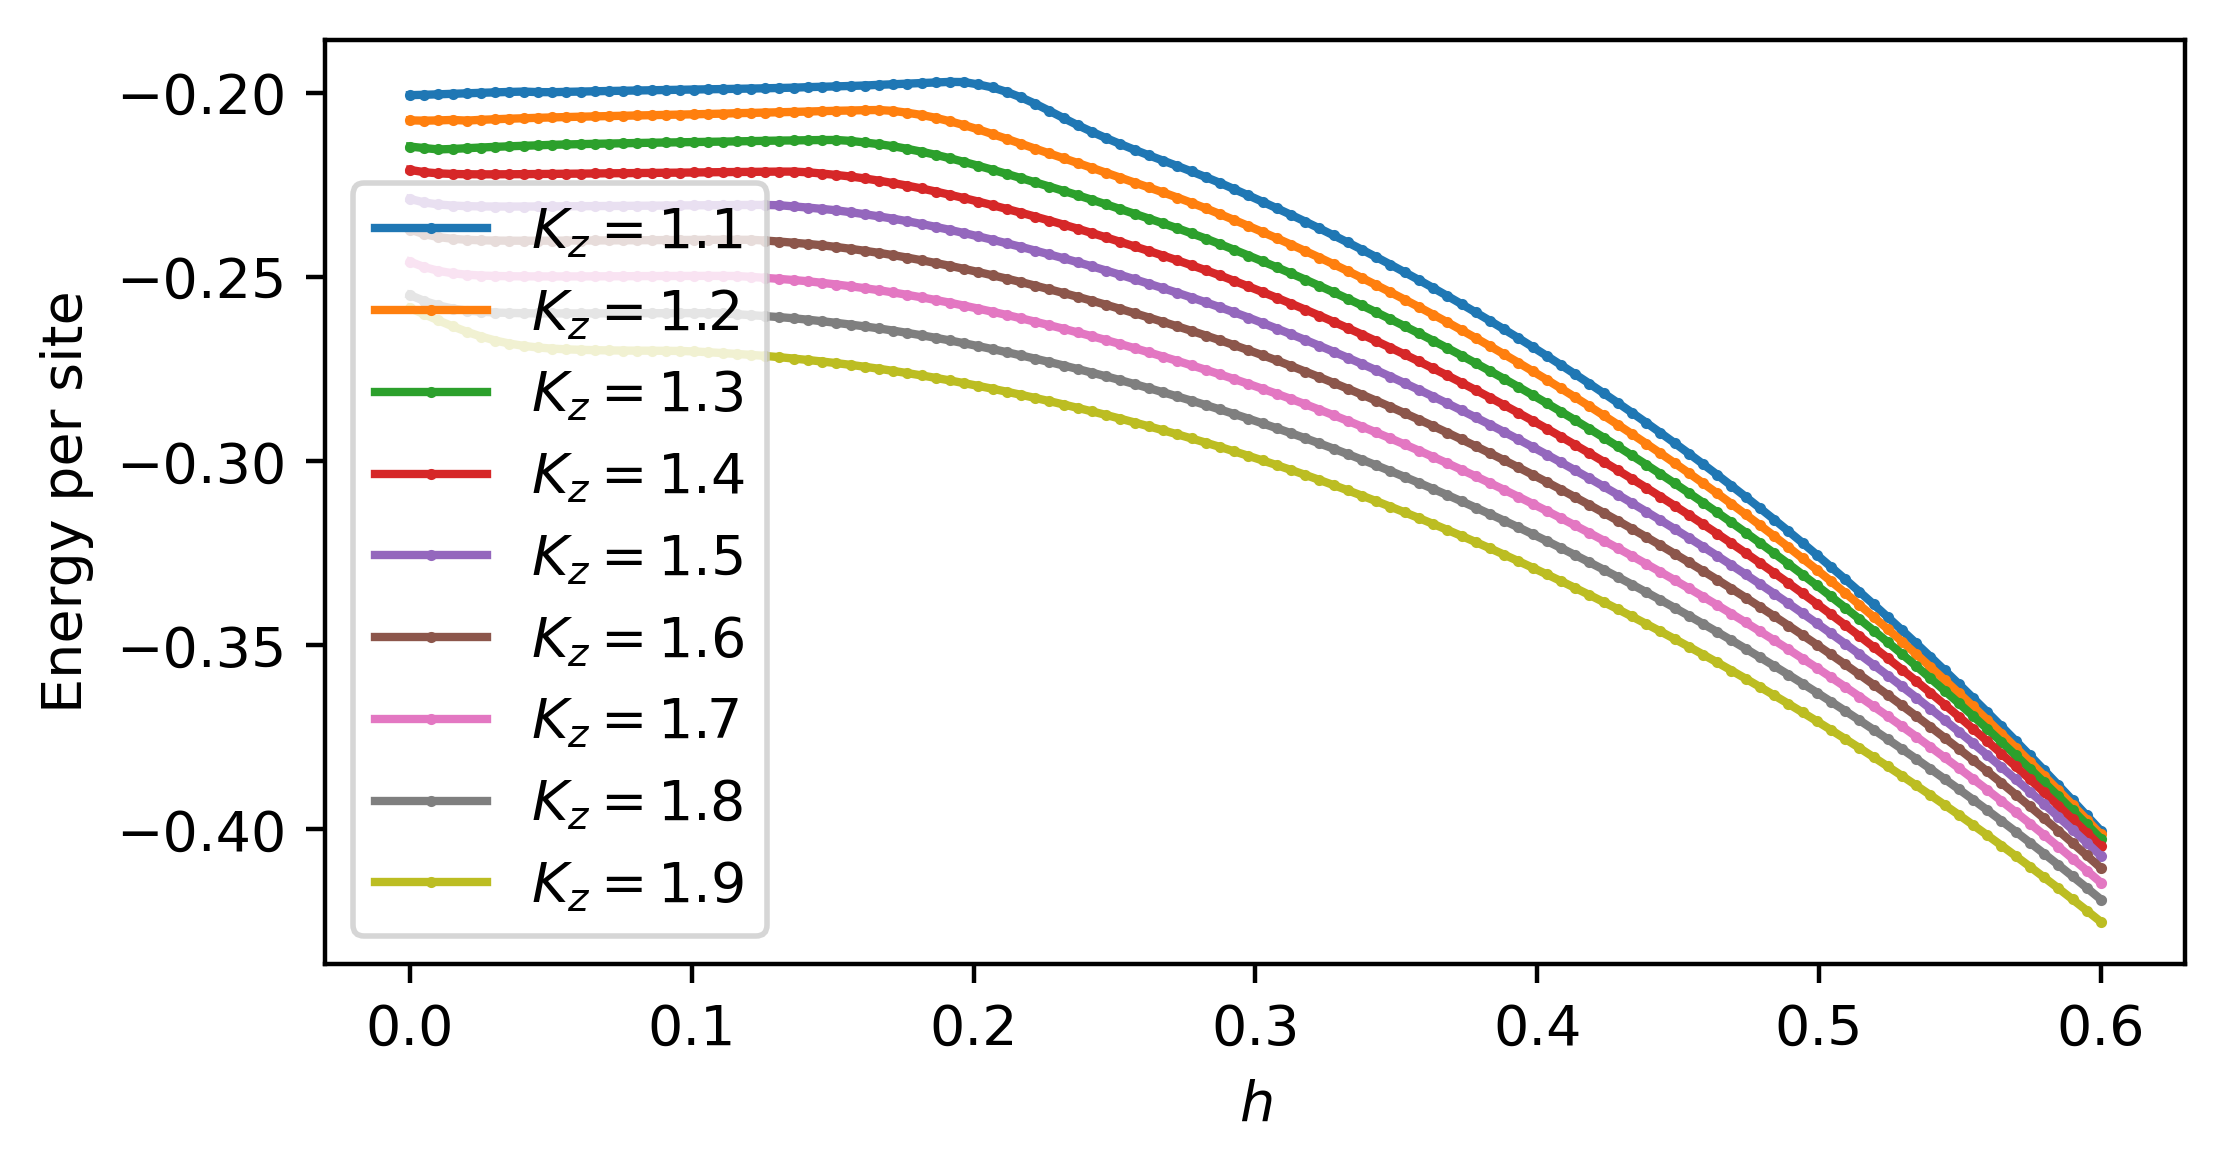

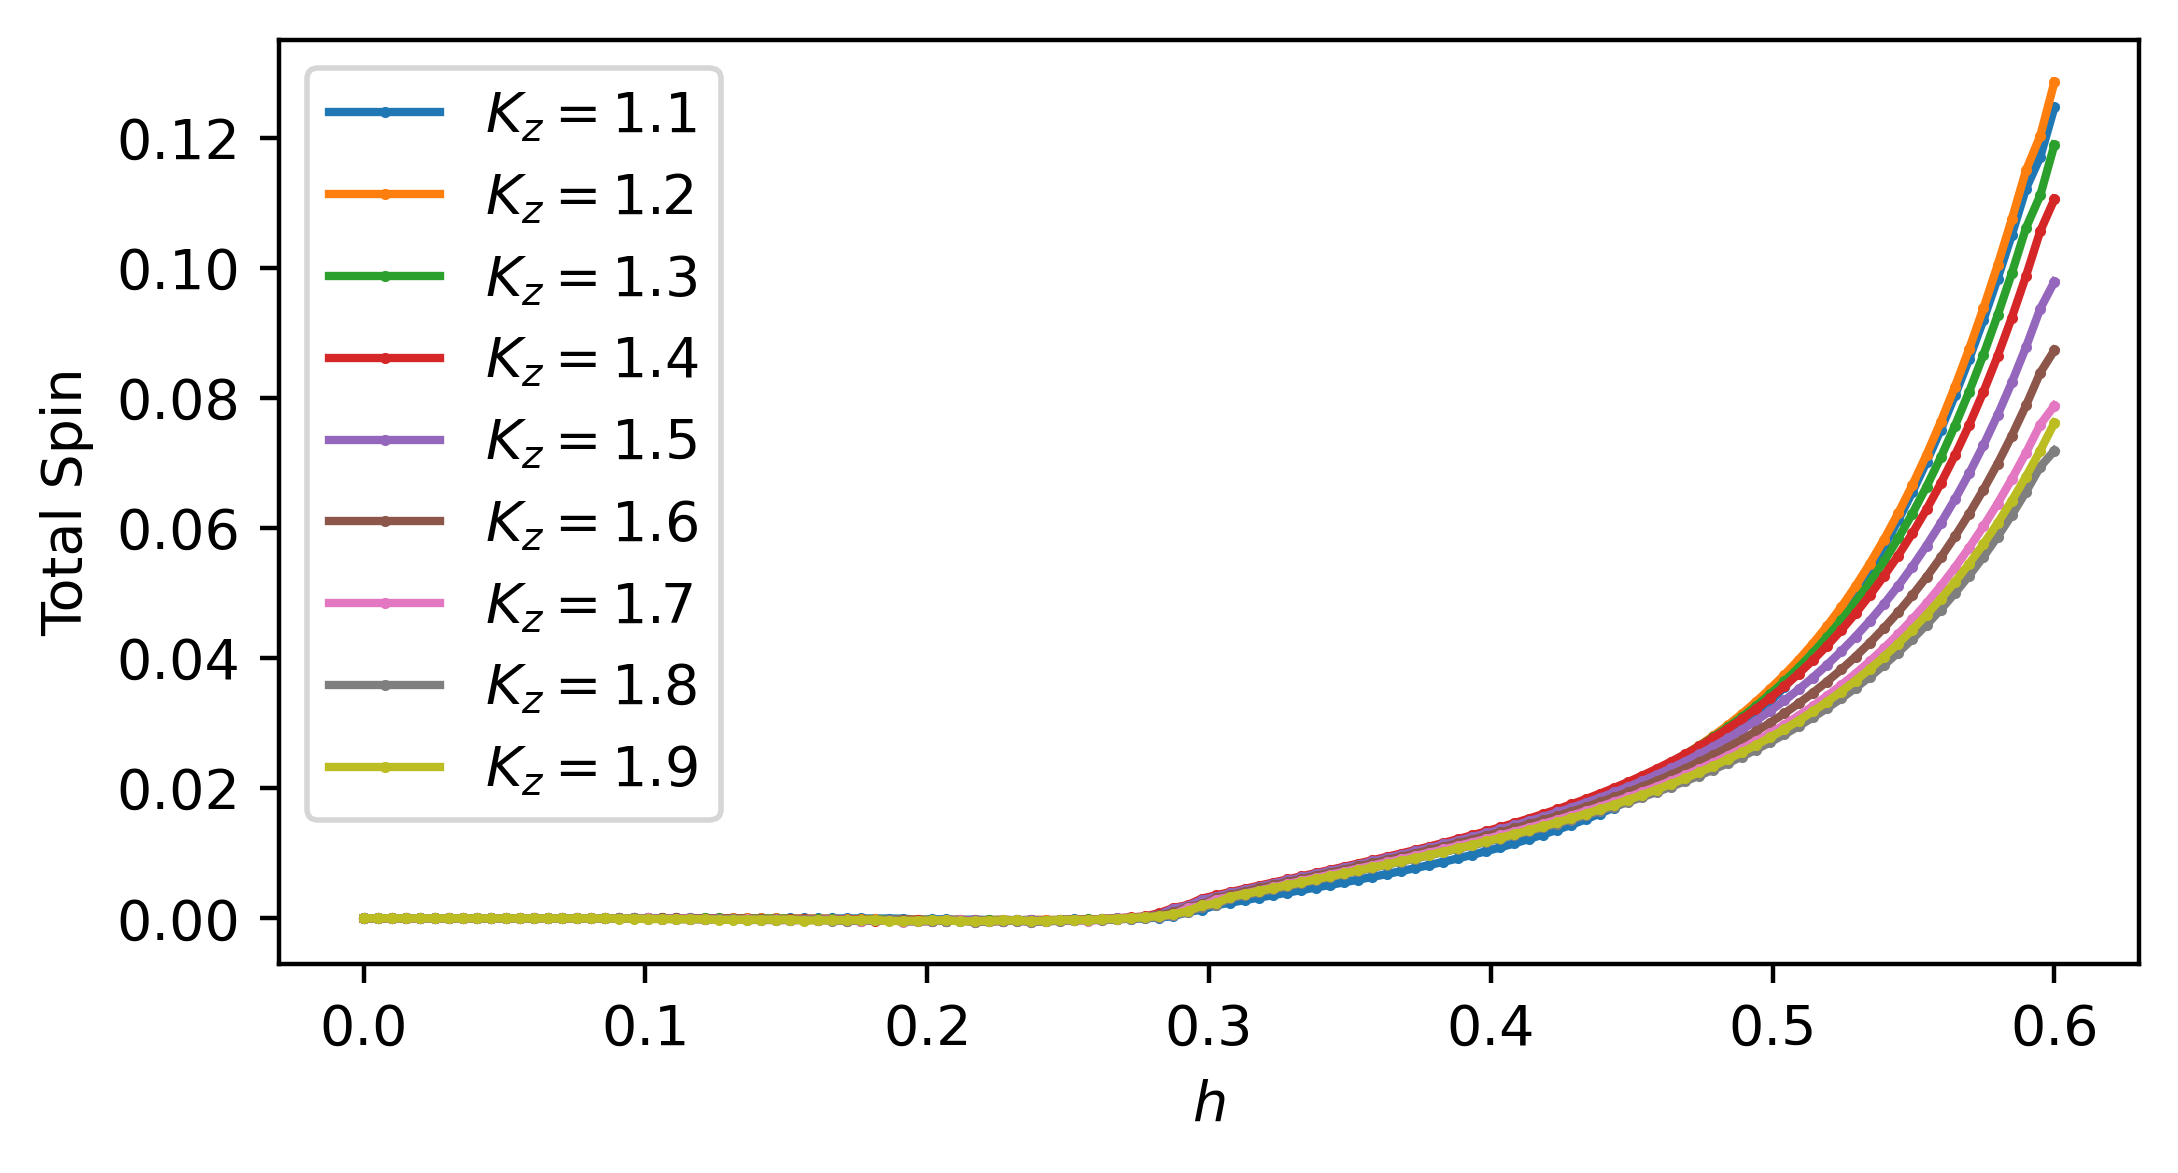

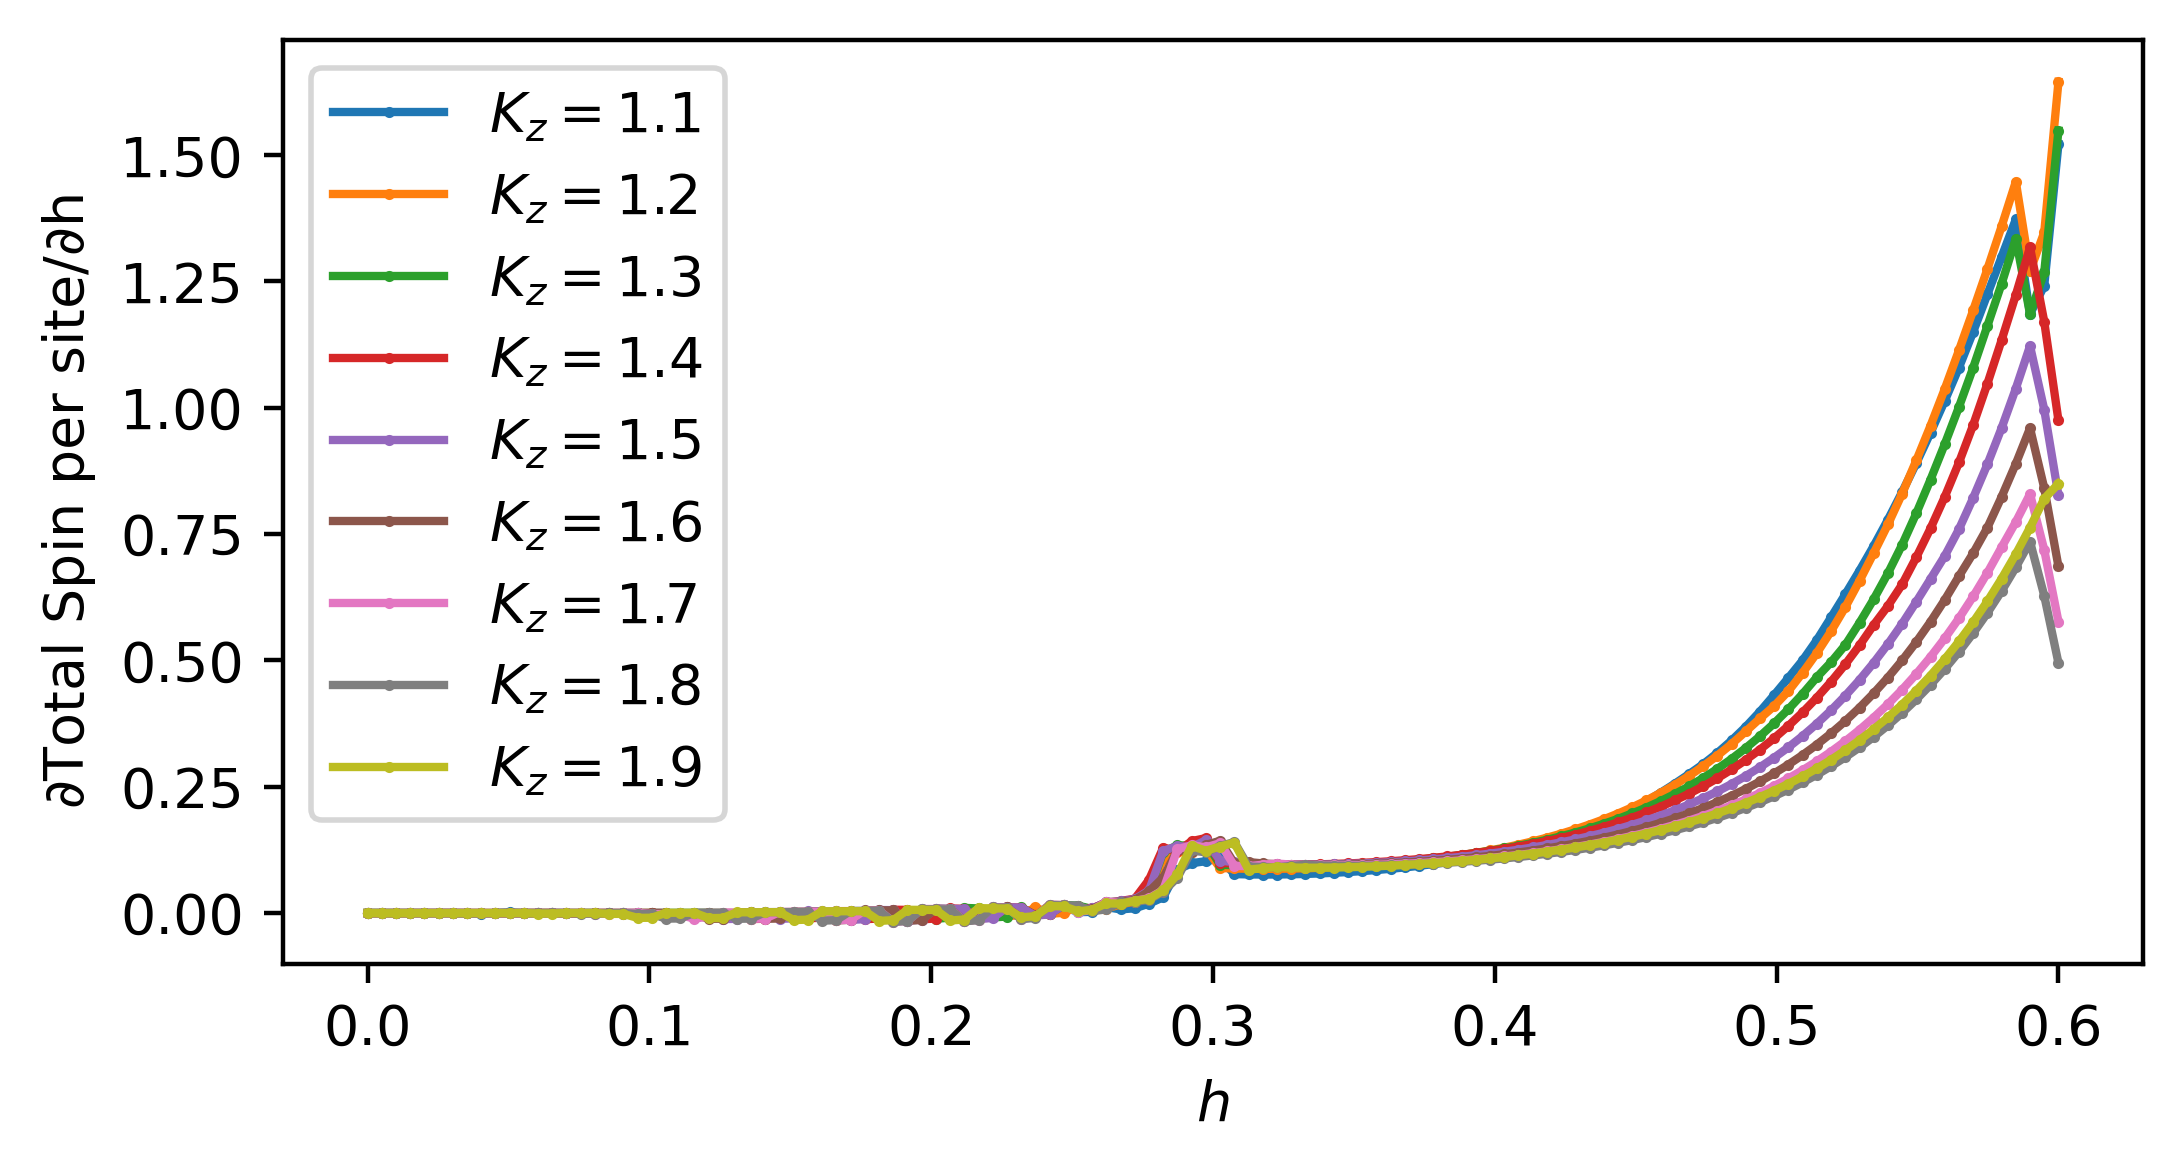

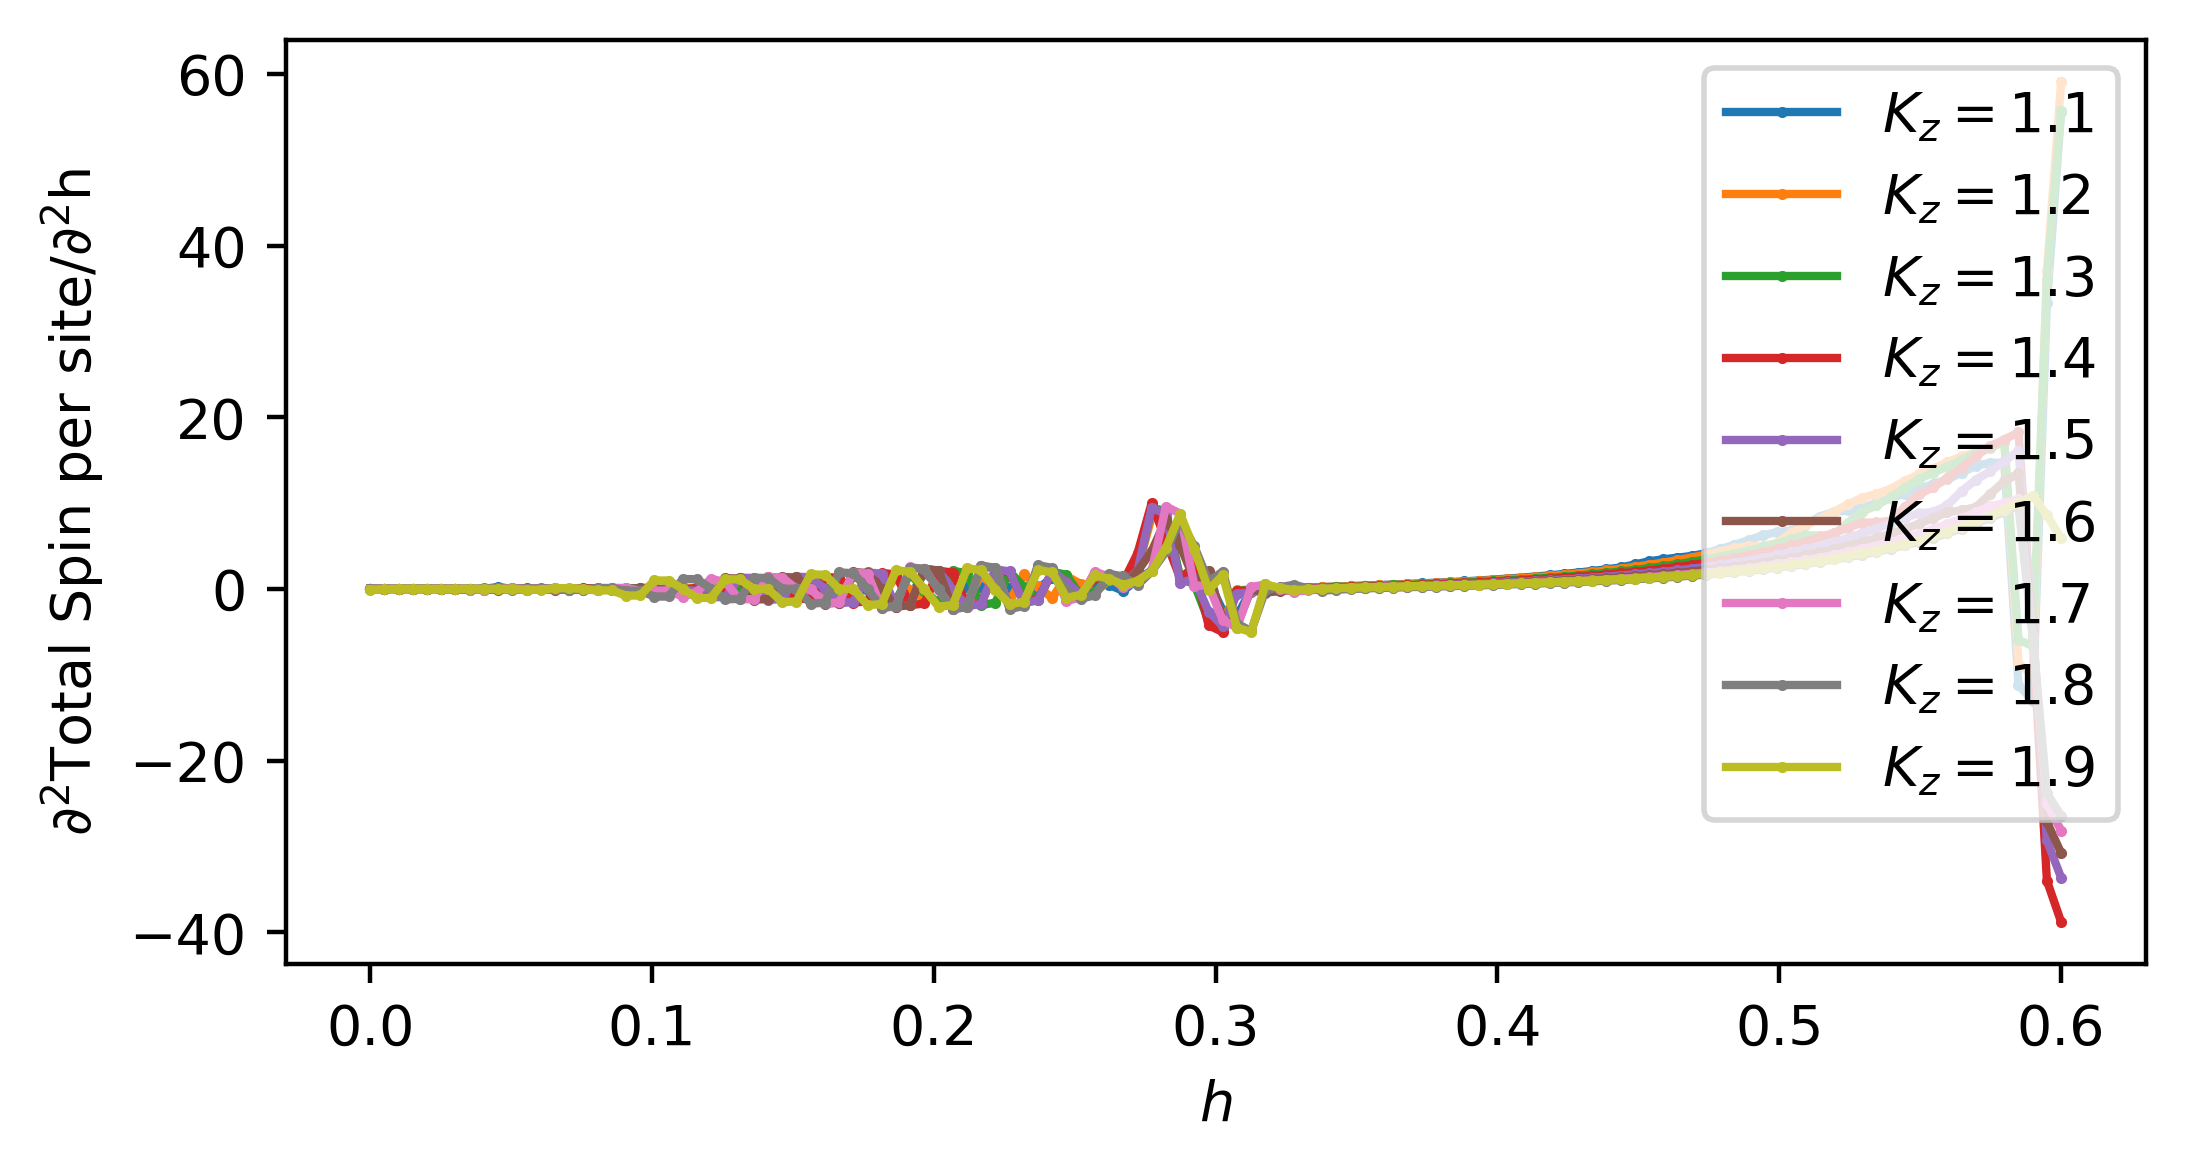

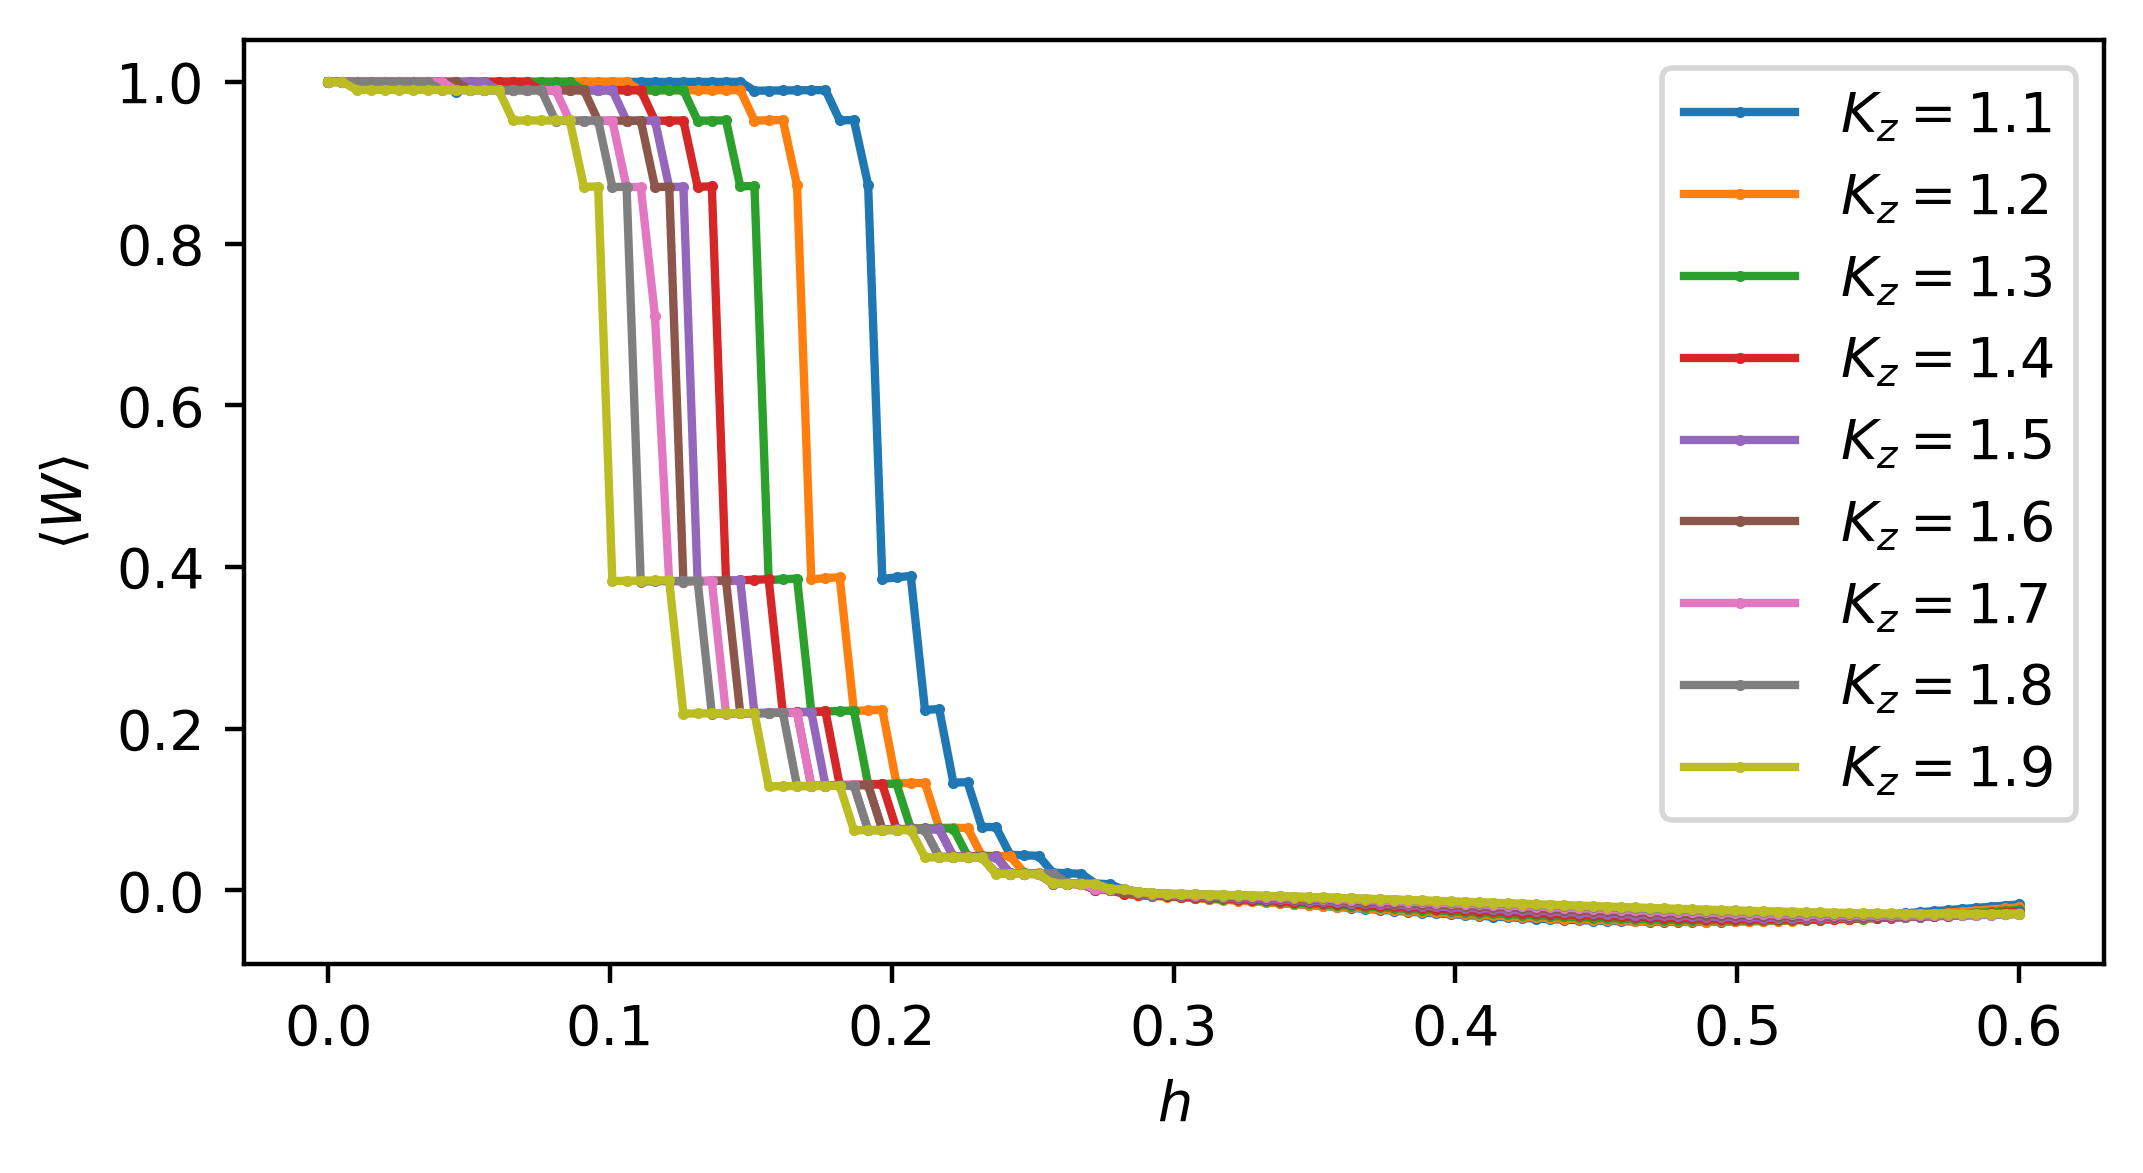

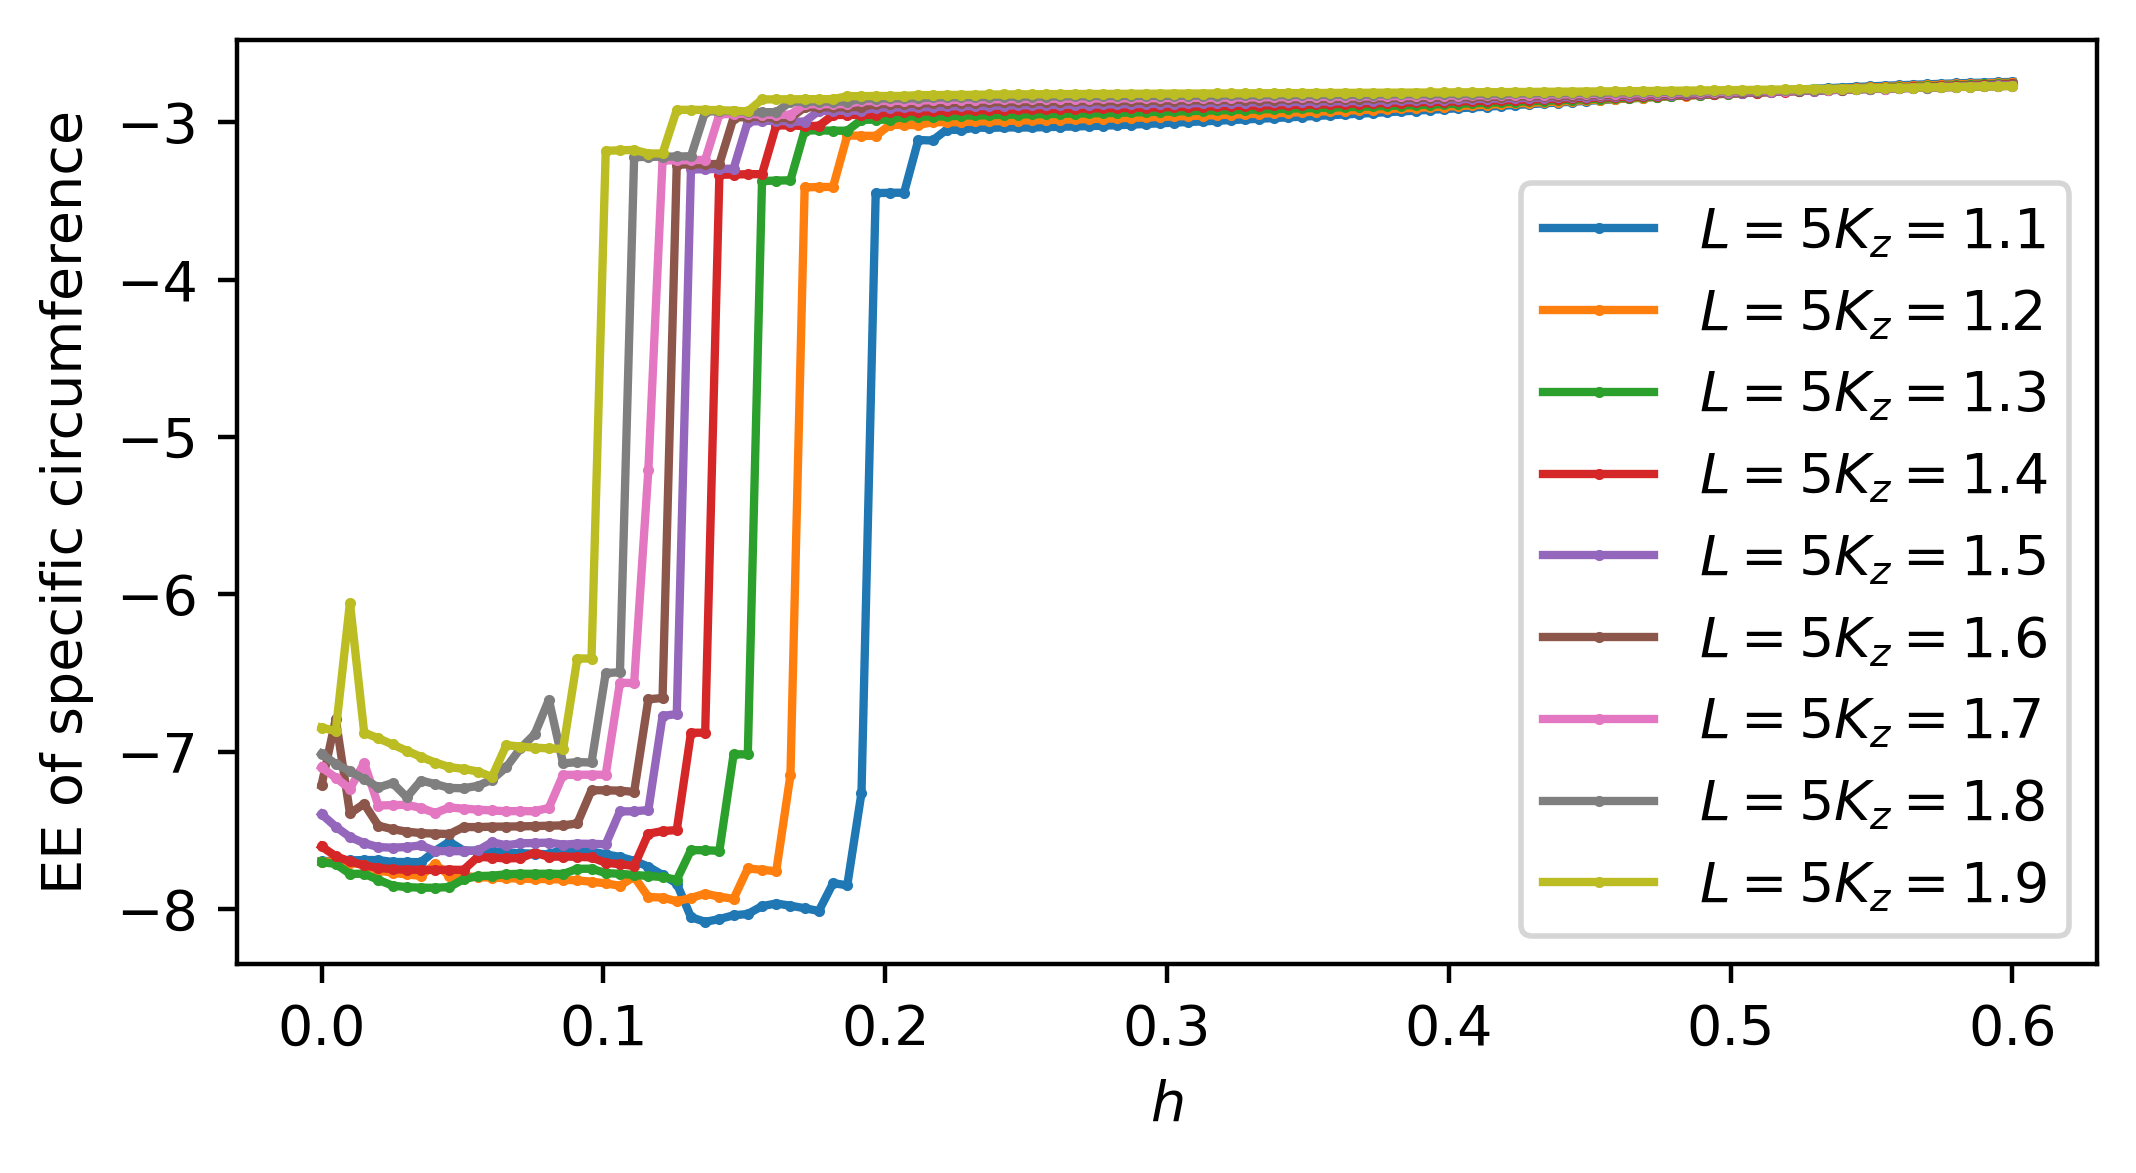

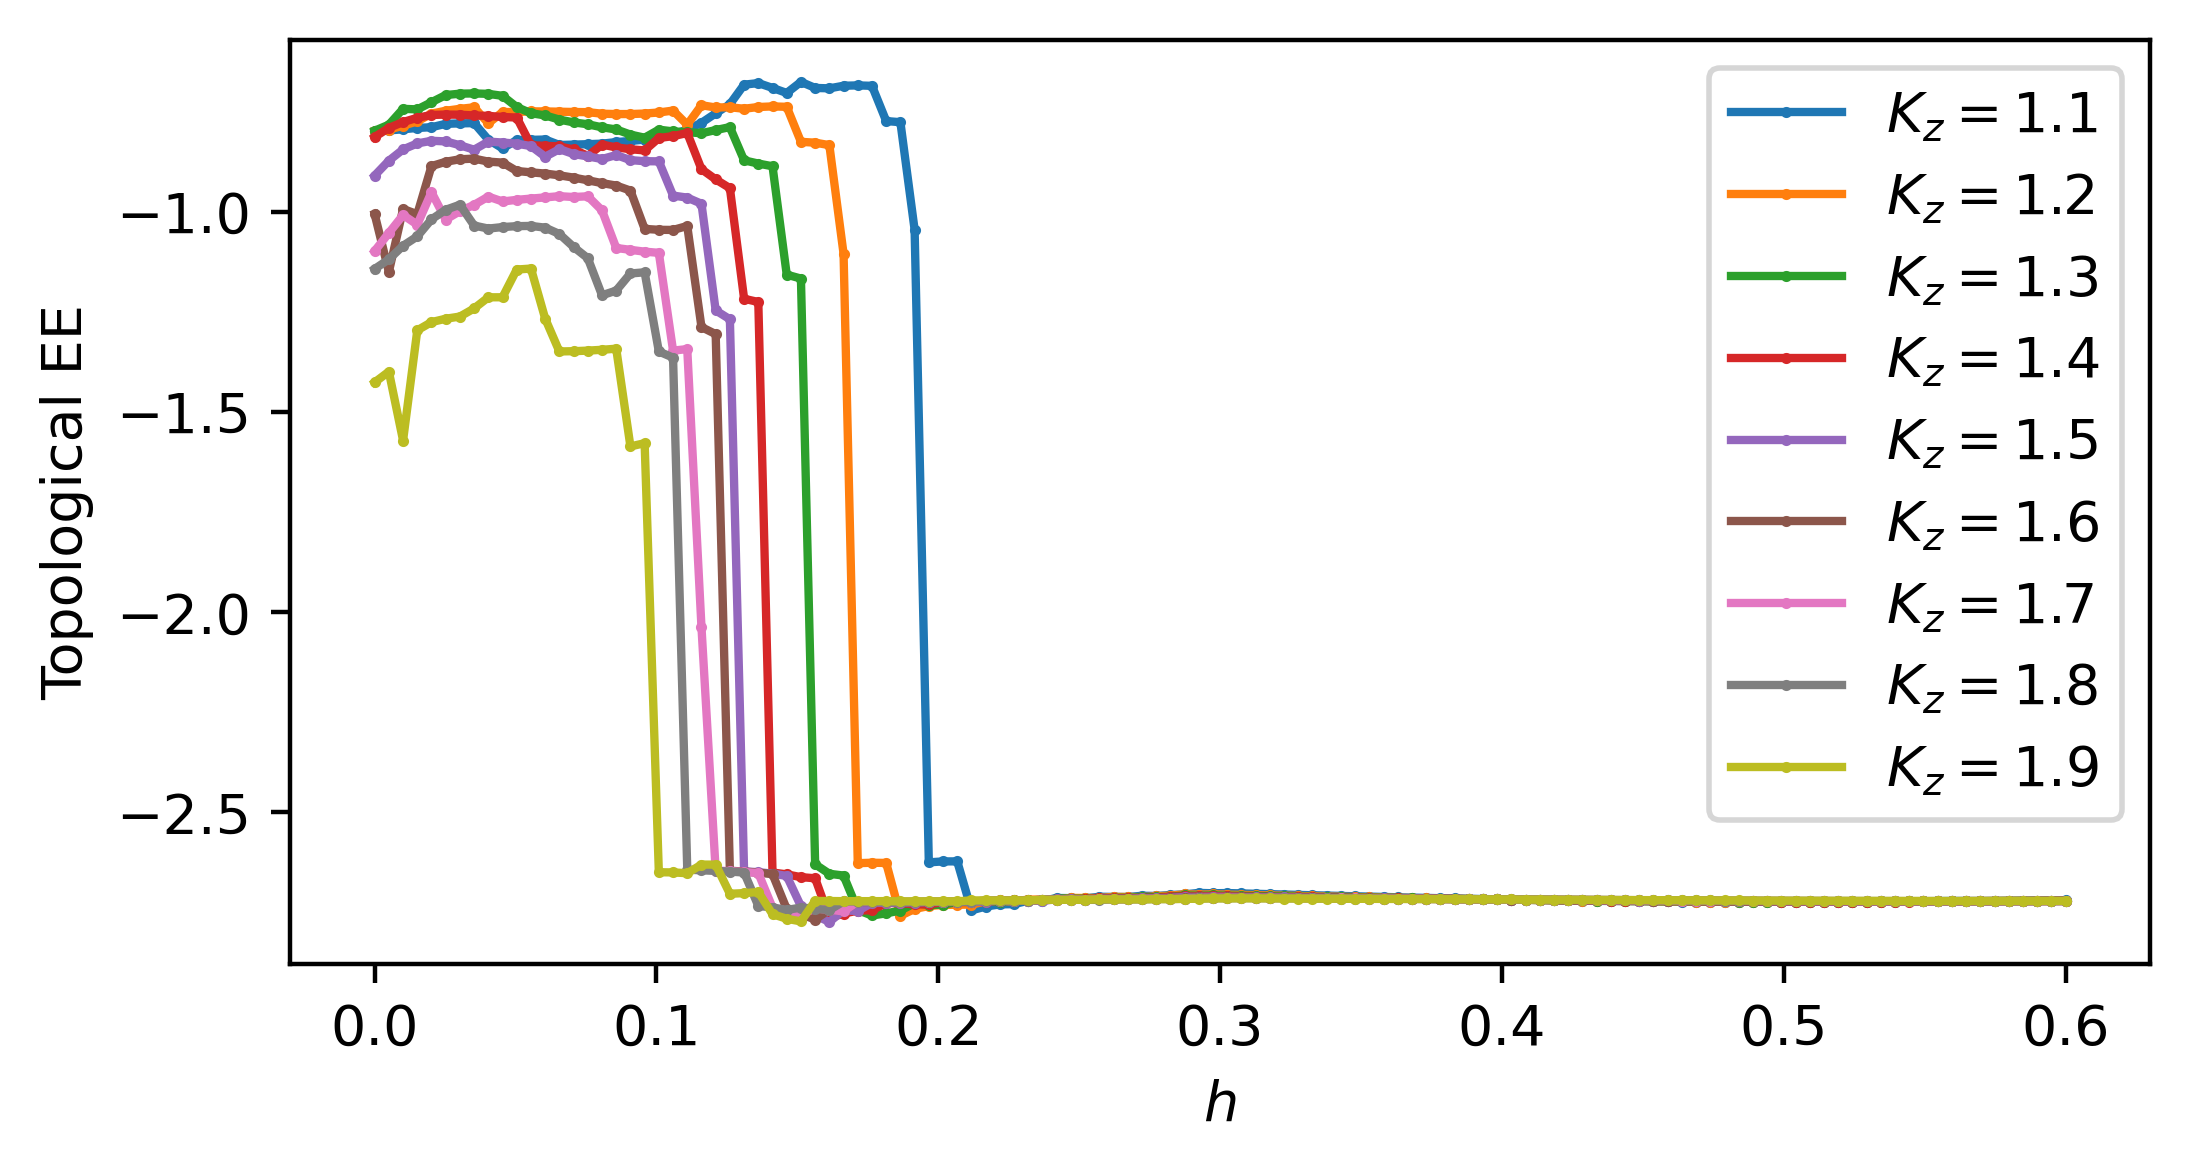

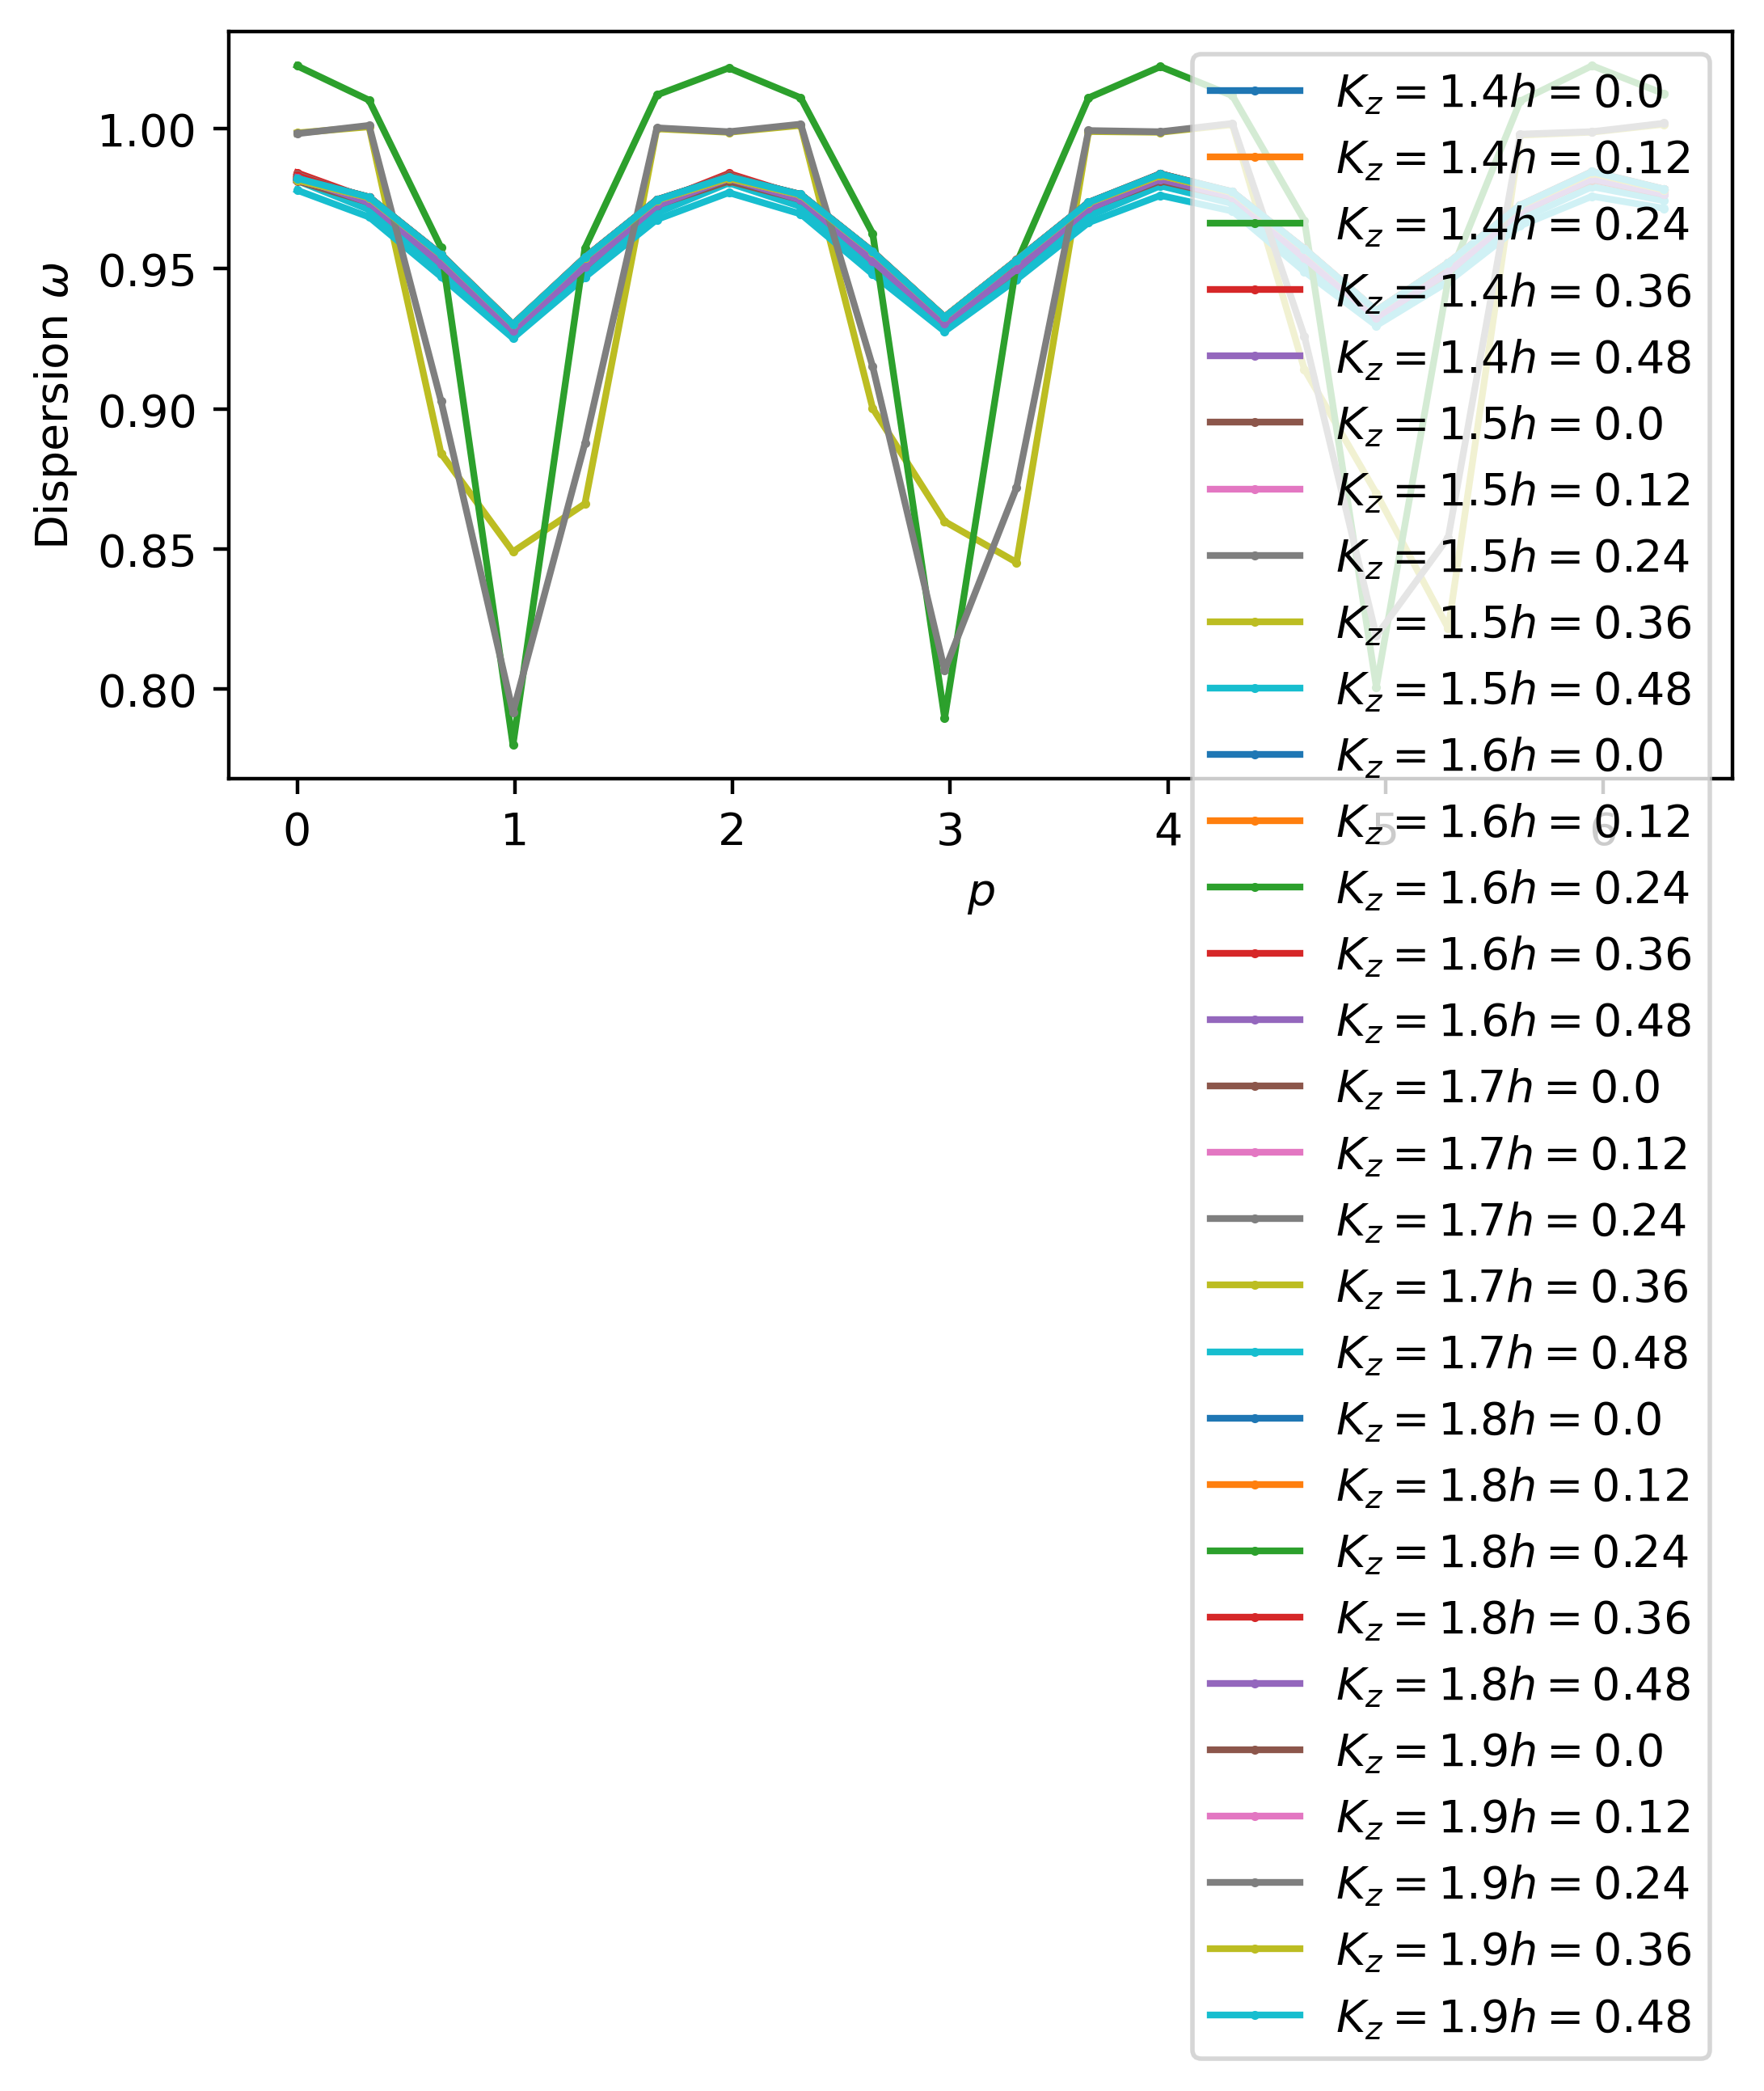

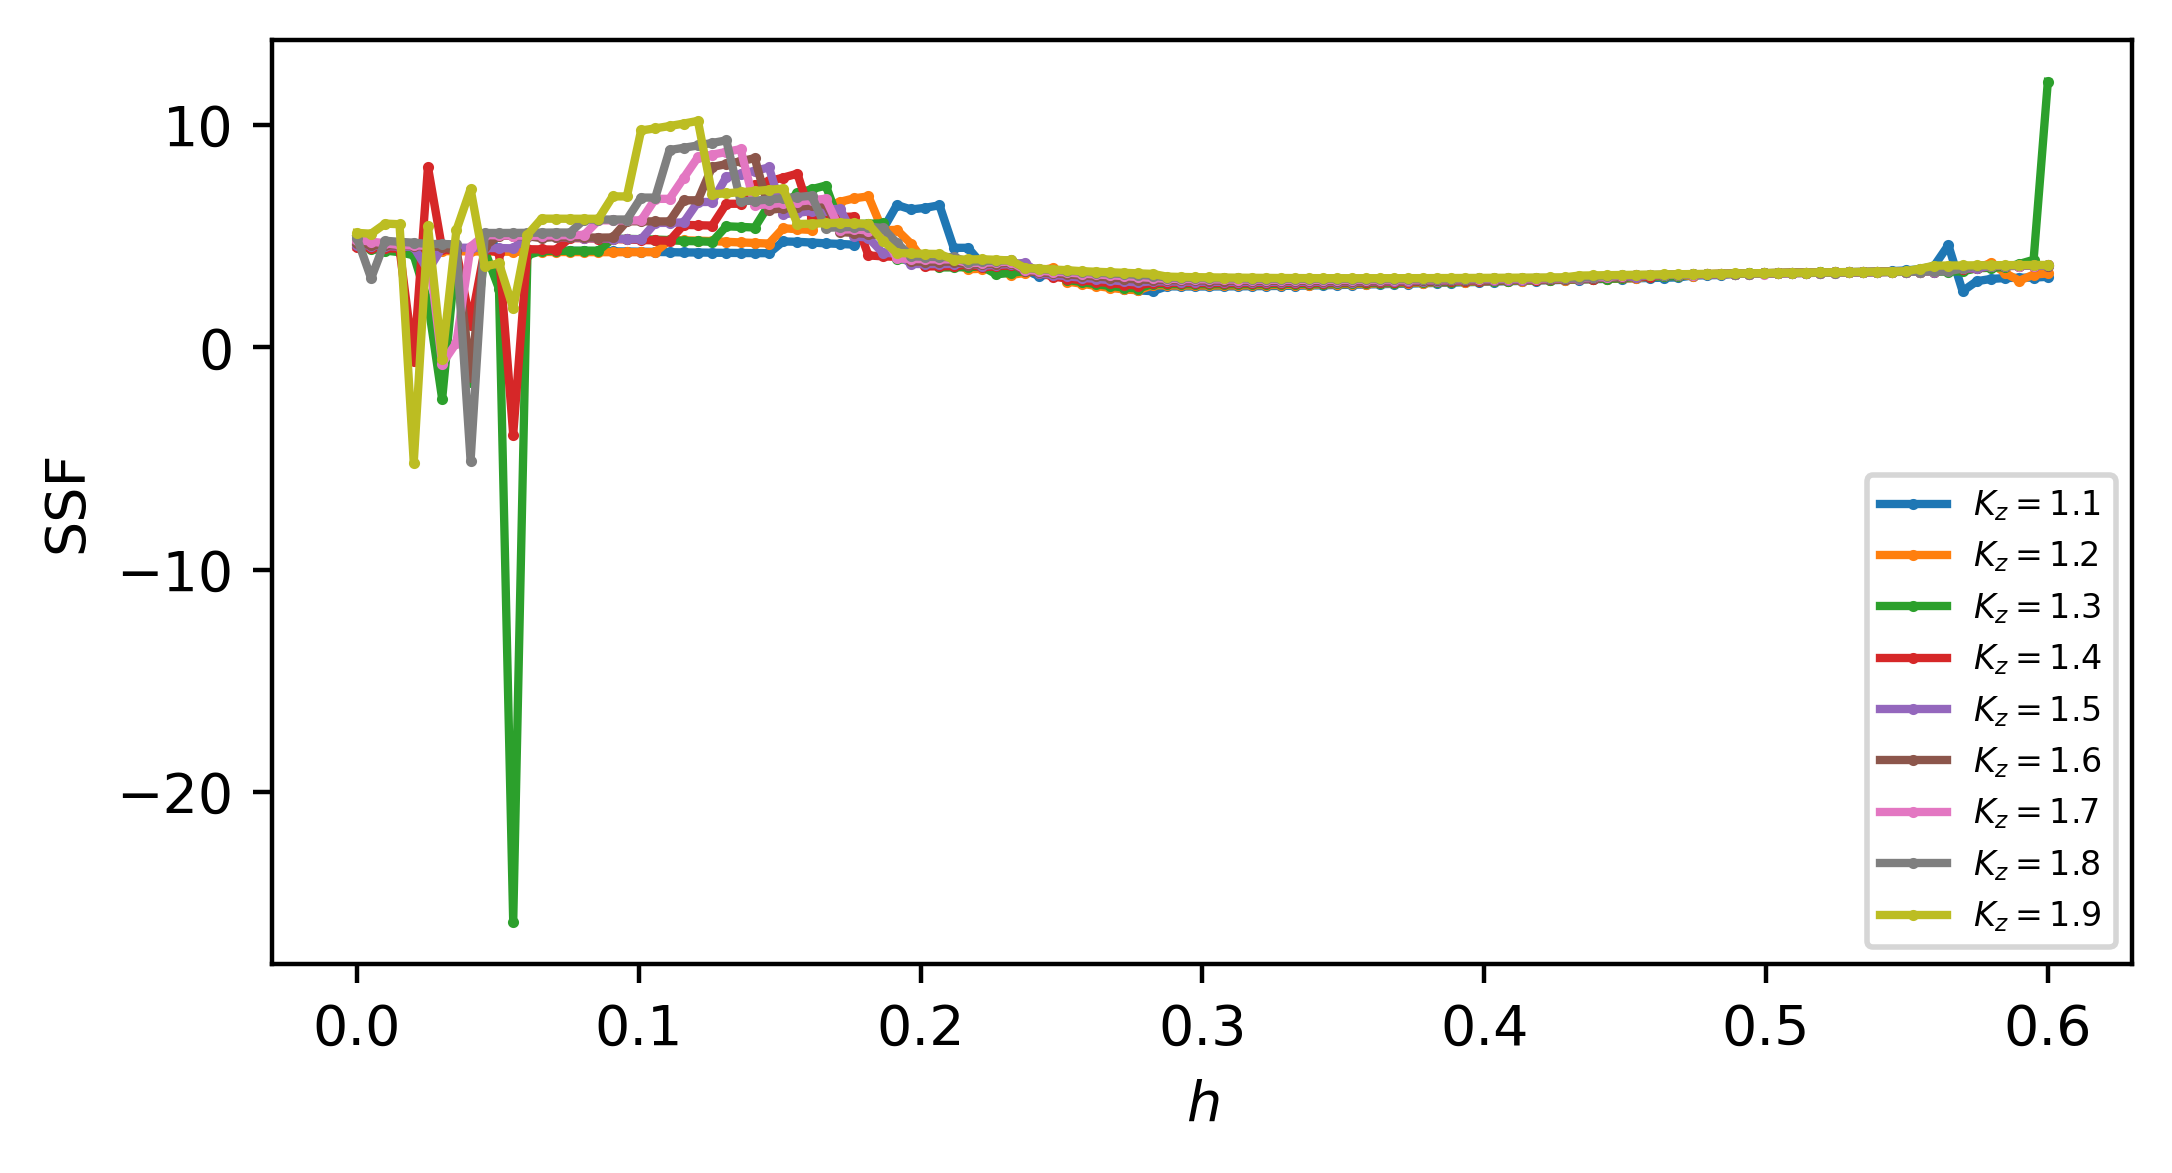

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from derivative import dxdt

def dot(tdvec, st1, st2):
    return tdvec[:,st1]*tdvec[:,st2]+tdvec[:,st1+1]*tdvec[:,st2+1]+tdvec[:,st1+2]*tdvec[:,st2+2]

# folder = "datas/aniksgdvarLG/"
# folder = "datas/aniksdg/"
# folder = "datas/aniksdg_noLG/"
# folder = "datas/aniksgd_sweep/"
# folder = "datas/aniksdg_noLG_sweepLG/"

# Used run_sweep_calcTotalSpin.py adn run_EE.sh
folder = "datas/aniksdg_noLG_sweepLG_TS/" #latest
exci_folder = "../mpo_excitation_cytnx/1d/anisok/"
SSF_folder = "../static_structural_factor/datas/aniksdg_noLG_sweepLG_SSF/"
# ignore = [1,2,3,4,5,6,7,8,9]
ignore = [0]
doW = True
oldfilename = False
hasTSdata = True # TotalSpin
doEE = True # Entanglement Entropy
EEcirc = range(1,6,1)
showcirc = [5]

doExci = True
# exciKz = [0,1,2,3,4,5,6,7,8,9]
# exciCnt = [0,24,48,72,96]
exciKz = [4,5,6,7,8,9]
exciCnt = [0,24,48,72,96]
w2draw = [0]

doSSF = True

fE = []
fMag = []
dpi=400
fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
for i in range(10):
  if i in ignore:
    continue
  fE = []
  if oldfilename:
    fE = np.loadtxt(folder+"anik_E1_h0_25toCSL_K1.{}.txt".format(i))
  else:
    fE = np.loadtxt(folder+"E_h0_0.6toCSL_K1.{}.txt".format(i))
  plt.plot(np.abs(fE[:, 0]),fE[:, 4], marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))

# fE = np.loadtxt("datas/anik/anik_E1_h0_25toCSL_noLG_K2.0.txt".format(i))
# plt.plot(np.abs(fE[:, 0]),fE[:, 4], marker = 'o' , markersize = 1, label = r"$K_z=2.0$")

plt.xlabel(r"$h$")
plt.ylabel(r"Energy per site")
plt.legend()
plt.show()
if hasTSdata==False:
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  totalspin = []
  for i in range(10):
    if i in ignore:
      totalspin.append([])
      continue
    fMag = []
    if oldfilename:
      fMag = np.loadtxt(folder+"anik_mag1_h0_25toCSL_K1.{}.txt".format(i))
    else:
      fMag = np.loadtxt(folder+"mag_h0_0.6toCSL_K1.{}.txt".format(i))
    totalspin.append(((dot(fMag,10,10)+dot(fMag,7,7)+dot(fMag,4,4)+dot(fMag,1,1)+dot(fMag,1,4)+dot(fMag,1,7)+dot(fMag,4,10)+dot(fMag,4,7)+dot(fMag,4,10)+dot(fMag,7,10))/3))
    plt.plot(np.abs(fMag[:,0]),totalspin[i], marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
  plt.xlabel(r"$h$")
  plt.ylabel(r"Total Spin per site")
  plt.legend()
  plt.show()

  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fMag = []
    if oldfilename:
      fMag = np.loadtxt(folder+"anik_mag1_h0_25toCSL_K1.{}.txt".format(i))
    else:
      fMag = np.loadtxt(folder+"mag_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fMag[:,0]),dxdt(totalspin[i],np.abs(fMag[:,0]),kind="finite_difference", k=1), marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
  plt.xlabel(r"$h$")
  plt.ylabel(r"$pTotal Spin per site/ph$")
  plt.legend()
  plt.show()

  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fMag = []
    if oldfilename:
      fMag = np.loadtxt(folder+"anik_mag1_h0_25toCSL_K1.{}.txt".format(i))
    else:
      fMag = np.loadtxt(folder+"mag_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fMag[:,0]),dxdt(dxdt(totalspin[i],np.abs(fMag[:,0]),kind="finite_difference", k=1),np.abs(fMag[:,0]),kind='finite_difference',k=1), marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
  plt.xlabel(r"$h$")
  plt.ylabel(r"$p^2Total Spin per site/p^2h$")
  plt.legend()
  plt.show()
else: #Has TotalSpin Data
  totalspin = []
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      totalspin.append([])
      continue
    fTS = np.loadtxt(folder+"TS_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fTS[:, 0]),fTS[:, 1], marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
    totalspin.append(fTS[:,1])
    
  plt.xlabel(r"$h$")
  plt.ylabel(r"Total Spin")
  plt.legend()
  plt.show()
  
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fTS = np.loadtxt(folder+"mag_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fTS[:,0]),dxdt(totalspin[i],np.abs(fTS[:,0]),kind="finite_difference", k=1),\
      marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
  plt.xlabel(r"$h$")
  plt.ylabel(r"$\partial$Total Spin per site/$\partial$h")
  plt.legend()
  plt.show()
  
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fTS = np.loadtxt(folder+"mag_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fTS[:,0]),dxdt(dxdt(totalspin[i],np.abs(fTS[:,0]),kind="finite_difference", k=1),\
      np.abs(fTS[:,0]),kind="finite_difference", k=1), marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
  plt.xlabel(r"$h$")
  plt.ylabel(r"$\partial^2$Total Spin per site/$\partial^2$h")
  plt.legend()
  plt.show()
if doW:
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fW = []
    if oldfilename:
      fW = np.loadtxt(folder+"anik_W1_h0_25toCSL_K1.{}.txt".format(i))
    else:
      fW = np.loadtxt(folder+"W_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fW[:, 0]),fW[:, 1], marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
    
  plt.xlabel(r"$h$")
  plt.ylabel(r"$\langle W\rangle$")
  plt.legend()
  plt.show()

if doEE:
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fEE = np.loadtxt(folder+"EE_h0_0.6toCSL_K1.{}.txt".format(i))
    for j in range(len(EEcirc)):
      if EEcirc[j] in showcirc:
        plt.plot(np.abs(fEE[:, 0]),fEE[:, 1+j], marker = 'o' , markersize = 1, label = r"$L={}K_z=1.{}$".format(EEcirc[j],i))
      # plt.plot(np.abs(fEE[:, 0]),fEE[:, 1+j], marker = 'o' , markersize = 1, label = r"$L{}K_z1.{}$".format(EEcirc[j],i)) 
  plt.xlabel(r"$h$")
  plt.ylabel(r"EE of specific circumference")
  plt.legend()
  plt.show()
  
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    ftopEE = np.loadtxt(folder+"topEE_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(ftopEE[:, 0]),ftopEE[:, 1], marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i)) 
  plt.xlabel(r"$h$")
  plt.ylabel(r"Topological EE")
  plt.legend()
  plt.show()


Dmps = 8
if doExci:
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in exciKz:
    for j in exciCnt:
      fExci = np.loadtxt(exci_folder+"Kz1.{}cnt{}Dmps{}.txt".format(i,j,Dmps))
      for k in range(1,len(fExci)):
        if k-1 in w2draw:
          plt.plot(fExci[:, 0],fExci[:, k], marker = 'o' , markersize = 1, label = r"$K_z=1.{}h={}$".format(i,0.6/120.0*j))
  plt.xlabel(r"$p$")
  plt.ylabel(r"Dispersion $\omega$")
  plt.legend()
  plt.show()
  
if doSSF:
  fig, ax = plt.subplots(figsize = (6,3), dpi = dpi)
  for i in range(10):
    if i in ignore:
      continue
    fSSF = np.loadtxt(SSF_folder+"SSF_h0_0.6toCSL_K1.{}.txt".format(i))
    plt.plot(np.abs(fSSF[:, 0]),fSSF[:, 1], marker = 'o' , markersize = 1, label = r"$K_z=1.{}$".format(i))
  plt.xlabel(r"$h$")
  plt.ylabel(r"SSF")
  plt.legend(fontsize="6", loc ="lower right")
  plt.show()